# EDSA 2201 & 2207 classification hackathon
© Explore Data Science Academy

___



---
## Predict Overview: <u> South African Language Identification Hack 2022</u>

#### <U>INTRODUCTION</U>

Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society..


---



#### <u> PROBLEM STATEMENT </u>
- South Africa is a multicultural society that is characterised by its rich linguistic diversity. <br>
- The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages <br>
> With such a multilingual population, it is only obvious that their systems and devices also communicate in multi-languages.

---

#### <u> TASK AHEAD </u>
In this challenge: <br>
- I am required to take text which is in any of South Africa's 11 Official languages and<br>
- Identify which language the text is in.<br>
> The task of determining the natural language that a piece of text is written in.

---

<a id="cont"></a>

#### <u> PROCESS

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis(EDA)</a>
    
<a href=#four>4. Modelling</a>

<a href=#five>5. Kaggle Sample Submission</a>

<a href=#six>6. Conclusion</a>

<a href=#seven>7. Refrences</a>

---

>>First, I will import the necesssary packages to get me started.<br> 
I am so excited

---

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [1]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd

# Libraries for data preparation 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import TreebankWordTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set plot style
sns.set()

#import matplotlib.style as style 
sns.set(font_scale=1.0)

RANDOM_STATE = 42

# Libraries for assessing model accuracy 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score


# Building classification models
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

---




<a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>



---

In [2]:
# Whats in this train data ?
df_train = pd.read_csv('train_set.csv')
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


>> The following are evident in the above output of the train dataset:<br>
>>- There are two variables,__lang_id__ as the dependent(target) variable and __text__ the independent(predictive) variable<br>
>>- Both variables are __categorical__ i.e.non-numerical datatypes.

In [3]:
# What is in this test data ?
df_test = pd.read_csv('test_set.csv')
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


>>It is evident in the above output of the test dataset that the __index__ column is __Numerical__ while the __text__ coumn is __categorical__ .The __text__ column is the __Predictive__ variable

In [4]:
# (.shape) will help to determine the number of rows and columns contained in the train dataset
df_train.shape

(33000, 2)

In [5]:
# (.shape) will help to determine the number of rows and columns contained in the test dataset
df_test.shape

(5682, 2)

>> The shape command shows that we have **33000** rows and **2** features in the **train** dataset
and **5682** rows and **2** columns in the **test** dataset.

The __info()__ function will help to know what all columns contain, of what types and if they contain any value or not.

In [6]:
# Check data types for all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


>> By observing the above data, we can conclude: <br>
>> Train Data contains an only __Object__ datatypes <br>
>> Test Data contains both __Object__ and __integer__ datatypes <br>
>> All the columns are non-null (no-empty or missing value).


---



<a id="three"></a>
## 3. Exploratory Data Analysis(EDA) / data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In case of text data like this one, there cant be any meaningful EDA before modifying or cleaning data. __Data cleaning__ helps to maximize results. For this section,both <br>
- __lang_id__ and <br>
- __text__ column will be visited.

 ### 3.1<u> Analysis of the (lang_id) variable</u>

#### (A). Language IDs<br>
> - __afr__  -   Afrikaans <br>
> - __eng__  -  English   <br>
> - __nbl__  -  isiNdebele<br>
> - __nso__  -  Sepedi    <br>
> - __sot__  -  Sesotho   <br>
> - __ssw__  -  siSwati   <br>
> - __tsn__  -  Setswana  <br>
> - __tso__  -  Xitsonga  <br>
> - __ven__  -  Tshivenda <br>
> - __xho__  -  isiXhosa  <br>
> - __zul__  -  isiZulu<br>

- The above is a display of the __lang_id__ column and their corresponding languages.

#### (B).  Count of Language in the dataset

In [8]:
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

#### (C). Visualize

<AxesSubplot:xlabel='lang_id', ylabel='count'>

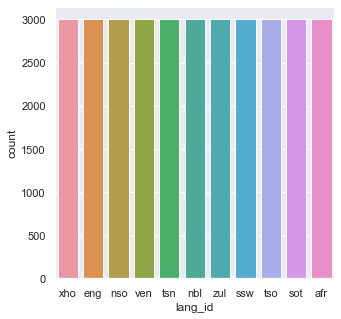

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(df_train['lang_id'])

A **countplot** can be thought of as a histogram across a categorical instead of quantitative variable and gives the result of a barplot.<br>
> - A countplot of the __lang_id__ feature is generated, where each bar represents the unique languages from the dataset and the height represents how many times that each language occurred, the chart above shows that<br>
> - There are __3000__ sentences of each language in the dataset



#### (D).  Replace unique IDs with languages.

In [10]:
def update(df):
    df_copy = df.copy()
    word_lang =[]
    for i in df_copy['lang_id'] :
        if i == 'afr' :
            word_lang.append('Afrikaans')  
        elif i == 'eng' :
            word_lang.append('English')
        elif i == 'nbl' :
            word_lang.append('isiNdebele')
        elif i == 'nso' :
            word_lang.append('Sepedi')
        elif i == 'sot' :
            word_lang.append('Sesotho')
        elif i == 'ssw' :
            word_lang.append('siSwati')
        elif i == 'tsn' :
            word_lang.append('Setswana')
        elif i == 'tso' :
            word_lang.append('Xitsonga')
        elif i == 'ven' :
            word_lang.append('Tshivenda')
        elif i == 'xho' :
            word_lang.append('isiXhosa')
        else :
            word_lang.append('isiZulu')
    df_copy['lang_id']= word_lang
    return df_copy

df_lang = update(df_train)
df_lang.head()

,lang_id,text
0,isiXhosa,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,isiXhosa,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,English,the province of kwazulu-natal department of tr...
3,Sepedi,o netefatša gore o ba file dilo ka moka tše le...
4,Tshivenda,khomishini ya ndinganyiso ya mbeu yo ewa maana...


 ### 3.2   <u> Analysis of the (TEXT) variable</u>

 -  __Text cleaning__ helps to maximize results, it’s important to distill text to the most important root words in the corpus and clean out unwanted noise. <br> 


>> Much cleaniness is not required for this project because Praekelt improved the training set through additional cleaning.It was recorded that the text is in various states of cleanliness. Nevertheless, some NLP techniques will be necessary to clean up the data.For this section,the text would be __tokenized__, and the __\n__ symbols would be removed.


In [12]:
# Display the text to be cleaned
''.join(df_train['text'].tolist())[:500]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrikai-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layothe province of kwazulu-nata'

In [13]:
def language_cleaner(text):
    
    text = re.sub('\n',' ',text)# replace \n with space
    
    tokeniser = TreebankWordTokenizer()
    text = tokeniser.tokenize(text)# convert to tokens
    
    text =[word for word in text if len(word)>=2]
    text =' '.join(text) #convert the tokens back to a string
    return text

- Apply the above code to the __text__ column

In [14]:
df_train['text'] = df_train['text'].apply(language_cleaner)
df_train['text']

0        umgaqo-siseko wenza amalungiselelo kumaziko ax...
1        i-dha iya kuba nobulumko bokubeka umsebenzi na...
2        the province of kwazulu-natal department of tr...
3        netefatša gore ba file dilo ka moka tše le dum...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na ntse sa utlwe hore thabang ra...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha mang le ona lokela ho etsa ditlaleho t...
Name: text, Length: 33000, dtype: object

In [15]:
# Display the cleaned text
''.join(df_train['text'].tolist())[:500]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrikai-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layothe province of kwazulu-nata'

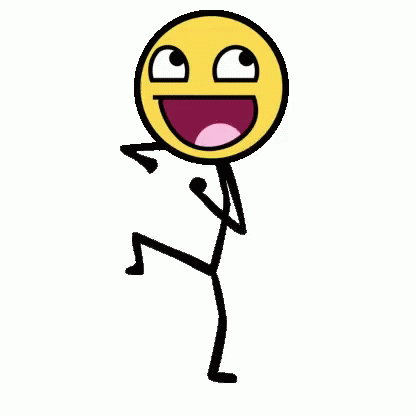
 >>   Great, text looks clean. Now, some feature engineering and modelling can be done.
                                                  

### 3.3 Separating features and labels

In [16]:
# Seperate features and tagret variables
X = df_train['text']
y = df_train['lang_id']

>> The Features(independent)variables are used for predictions while the target are the classes to be predicted. The above commands  are used to separate them.

### 3.3 Train - Validation split

In [17]:
# Split the train data to create validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

>> Just before a model is built,the train dataset will be splited into a new
___train__ set and a
__validation__ 
set called __X_test__ and __y_test__.The validation set, as the name implies, will validate the accuracy of the model that will be built.

In [18]:
X_train

22148    ku hlaseriwa hi dzolonga ka vahlampfa lava tsh...
3034     maasesele ya xidayiginosisi ya tirhisiwa ku ku...
13406    any employee in electronic security function i...
10826    ngalokho esikutholako emakorweni woke womphaka...
9149     ukuxegiselwa kuyonqamuka uma ofake isicelo esh...
                               ...                        
32432    mukhomi wa wa mfanelo wo lavisisa swicelwa mfa...
21425    maikemisetso khomishene ke ho matlafatsa molao...
3679     njengombana abafazi bebangatjhejwa phambilini ...
12963    badiri ba ne ba bona tshedimosetso le katiso g...
12520    ho bohlokwa ho ela hloko hore tshebediso ena y...
Name: text, Length: 26400, dtype: object

___

<a id="four"></a>
## 4. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


---

>> __Pipelines__ consist of 2 steps, ___vectorization__(feature extraction) and __model fitting__. Machines, unlike humans, cannot understand the raw text.Therefore, we need to convert our text into numbers. The __TFIDF vectorizer__ assigns word frequency scores that try to highlight frequent words in a document. Another advantage of this method is that the resulting vectors are already scaled.<br>
- Here comes the crucial part of the project


### 4.1  Model building 


___

- __Naive bayes__ classifier will be considered for this project

In [19]:
# Naive bayes
nb = Pipeline([('tfidf', TfidfVectorizer(max_features=5000)),
               ('clf', MultinomialNB())
              ])

   ### 4.2  Model training and predictions



---

In [20]:
# train and predict Naive bayes 
nb.fit(X_train, y_train)
y_pred_nb= nb.predict(X_test)


### 4.3 Model Evaluation




---

> #### (A). Confusion Matrix
>> __Confusion matrix__ is a __data visualization__ resource.It helps to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

In [39]:
print(confusion_matrix(y_test, y_pred_nb))

[[600   0   0   0   0   0   0   0   0   0   0]
 [  0 600   0   0   0   0   0   0   0   0   0]
 [  0   1 593   0   0   0   0   0   1   0   5]
 [  0   0   0 599   0   0   1   0   0   0   0]
 [  0   0   0   0 600   0   0   0   0   0   0]
 [  0   0   0   0   0 600   0   0   0   0   0]
 [  0   0   0   0   0   0 600   0   0   0   0]
 [  0   0   0   0   0   0   0 600   0   0   0]
 [  0   0   0   0   0   0   0   0 600   0   0]
 [  0   1   2   0   0   0   0   0   0 591   6]
 [  0   2   2   0   0   3   0   0   0   4 589]]


>#### (B) Accuracy Score

>> The more accurate the model, it will give the precise results in various scenarios making the model more meaningful and relevant when used in real life.

In [23]:
print(accuracy_score(y_test,y_pred_nb))

0.9957575757575757


> #### (C) Classification Report

>> A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

In [24]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       600
         eng       0.99      1.00      1.00       600
         nbl       0.99      0.99      0.99       600
         nso       1.00      1.00      1.00       600
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       600
         tsn       1.00      1.00      1.00       600
         tso       1.00      1.00      1.00       600
         ven       1.00      1.00      1.00       600
         xho       0.99      0.98      0.99       600
         zul       0.98      0.98      0.98       600

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



The above output displays a very high __F1_score__ when tested on the validation set. The score of __1.00__ is the highest a model can get. Its a good one

### 4.4 Test dataset

---
Clean the unseen data

In [25]:
df_test['text'] = df_test['text'].apply(language_cleaner)
df_test['text']

0       Mmasepala fa maemo kgethegileng letlelela kgat...
1       Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2               Tshivhumbeo tshi fana na ngano dza vhathu
3       Kube inja nelikati betingevakala kutsi titsini...
4                            Winste op buitelandse valuta
                              ...                        
5677                      You mark your ballot in private
5678    Ge ka kgetha ka bowena go se šomiše Mofani ka ...
5679    Ka kopo etsa kgetho ya hao ka hloko hobane ha ...
5680    TB ke bokudi ba PMB mme Morero tla lefella tlh...
5681                 Vakatjhela iwebhusayidi yethu ku-www
Name: text, Length: 5682, dtype: object

<a id="five"></a>
## 5. Kaggle Sample Submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [37]:
def gen_kaggle_csv(model, df):
    
    #load the test data to a varable "X_unseen"
    X_test = df['text']
    
    #Make a prediction on the test data with the trained model
    mypreds = model.predict(X_test)
    
    #Reset the index of the test data
    df.reset_index(inplace=True)
    
    #Make a copy of the tweet id 
    index = df['index']
    
    #Convert the tweet_id and the prediction 
    sample_submission = pd.DataFrame({'index' : index, 
                                  'lang_id': mypreds})
    
    #convert file to csv
    sample_submission.to_csv('kaggle.csv', index=False)

    return sample_submission
gen_kaggle_csv(nb, df_test)

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


### (5.1) Save Trained model
>>It is important to save and reload this trained machine learning model, it can be used on any kind of object.

In [38]:
def save_pickle_file(model, file_name):
    # import the pickle module
    import pickle
    
    #asign a path to the file_name 
    model_save_path = file_name 
    
    #save file to thespecified path
    with open(model_save_path,'wb') as file: 
        pickle.dump(model,file)
    
    return  model_save_path

save_pickle_file(nb, "nb_model.pkl")

'nb_model.pkl'

## 6. Conclusion

>> This project covers techniques for cleaning text data and extracting features to use with machine learning models. It also demonstrated how TfidVectorizer can be used to clean text data and extract features, transforming the text data into a matrix of numbers that can be fed into a machine learning model.Results of the accuracy was made to Kaggle and saved as well for future use.

## 7. Refrences

- NLP:https://www.youtube.com/watch?v=P8M9KFRBWGg&t=47s
- NLP: https://www.youtube.com/watch?v=wcfKmwpXba4&t=238s
- ATHENA: https://athena.explore-datascience.net/